In [167]:
!pip install wordcloud
!pip install psaw
!pip install praw

In [168]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import praw
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
# Nananana Botman
reddit = praw.Reddit(client_id ='uG8ftAJoXRMhcw',
                     client_secret ='UV9TeqF36XzlJnmJq0WA4s0dUHs',
                     user_agent='Rollypollyolly by /u/scraper_bot420',
                     username ='scraper_bot420',
                     password ='samk1500')

In [169]:
subreddit = reddit.subreddit("the_donald")
print(subreddit.title)

The Donald - America First! // The_Donald


In [170]:
# Scraping Stats from top 1000 submissions of all time from The_Donald and appending to lists
score = []
for submission in subreddit.top(limit=1000):
     score.append(submission.score)

unix_time = []
for submission in subreddit.top(limit=1000):
    unix_time.append(submission.created_utc)

comment_count = []
for submission in subreddit.top(limit=1000):
    comment_count.append(submission.num_comments)

upvote_ratio = []
for submission in subreddit.top(limit=1000):
    upvote_ratio.append(submission.upvote_ratio)


sub_id = []
for submission in subreddit.top(limit=1000):
    sub_id.append(submission.id)

# Unix to Datetime Converter 
# unix_time = pd.to_datetime(unix_time, unit="s")


In [183]:
# Create dataframe from scraped lists
top_sub_comments = pd.DataFrame()
top_sub_comments["Total Upvotes"] = score
top_sub_comments["Time Stamp"] = unix_time
top_sub_comments["Total Comments"] = comment_count
top_sub_comments["Upvote Ratio"] = upvote_ratio
top_sub_comments["Submission #ID"] = sub_id

top_sub_comments.head()



,Total Upvotes,Time Stamp,Total Comments,Upvote Ratio,Submission #ID
0,66714,1.478677e+09,11977,0.77,5bzjv5
1,42119,1.469659e+09,20615,0.73,4uxdbn
2,40975,1.481063e+09,826,0.65,5gvy1j
3,37272,1.482443e+09,722,0.64,5jt9xs
4,36620,1.478673e+09,1678,0.68,5bz5ds


In [191]:
# Sorts by TimeStamp and then Saves Dataframe to CSV file 
top_export = top_sub_comments.sort_values(by=["Time Stamp"])
top_export.to_csv(r"top_sub_comment_data_unix_sorted.csv")

# Scrape all comments from top 100 submissions of all time on The_Donald
master_comment_list = []
for submission in subreddit.top(limit=100):
    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():
        master_comment_list.append(comment.body)

# Saves all comments to txt
MyFile=open('master_comments_top(100).txt', 'w', encoding="utf-8")
for element in master_comment_list:
     MyFile.write(element)
     MyFile.write('\n')
MyFile.close()

### Quarantine Scraper Placeholder

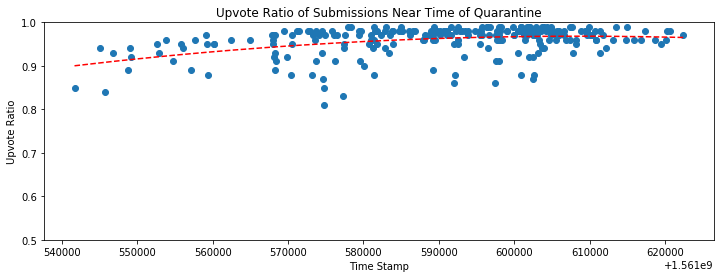

In [154]:
# Opening File
data = pd.read_csv("quarantine_submission_data_real_unix_sort.csv")

# Scatter Plot
plt.figure(figsize=(12,4))
plt.scatter(data['Time Stamp'], data['Upvote Ratio'])
plt.title("Upvote Ratio of Submissions Near Time of Quarantine")
plt.ylabel("Upvote Ratio")
plt.xlabel("Time Stamp")
plt.ylim(.5, 1)
x = data["Time Stamp"]
y = data["Upvote Ratio"]

# Regression Line
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")


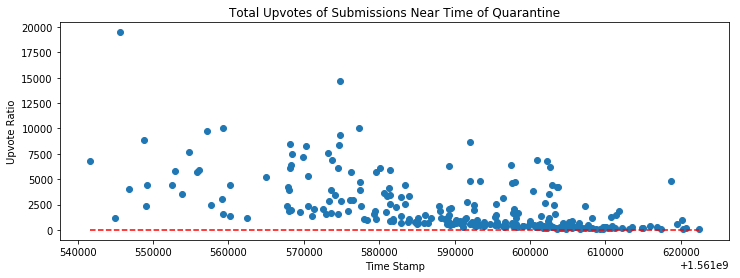

In [160]:
# Opening File
data4 = pd.read_csv("quarantine_submission_data_real_unix_sort.csv")

# Scatter Plot
plt.figure(figsize=(12,4))
plt.scatter(data4['Time Stamp'], data4['Total Upvotes'])
plt.title("Total Upvotes of Submissions Near Time of Quarantine")
plt.ylabel("Upvote Ratio")
plt.xlabel("Time Stamp")
x = data4["Time Stamp"]
y = data4["Upvote Ratio"]

# Regression Line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

Not a very interesting graph, but leads to further questions. It would be interesting to look at a total aggregate of all threads' total upvotes within +/- 1 week of submission. Maybe popularity tracking? Which might also be biased depending on the algorithm due to the odd demographics of The_Donald which were only exacerbated by the quarantine (is it total upvotes+total downvotes+total visits+total submissions+total comments or what combination thereof? lots of confounding variables)

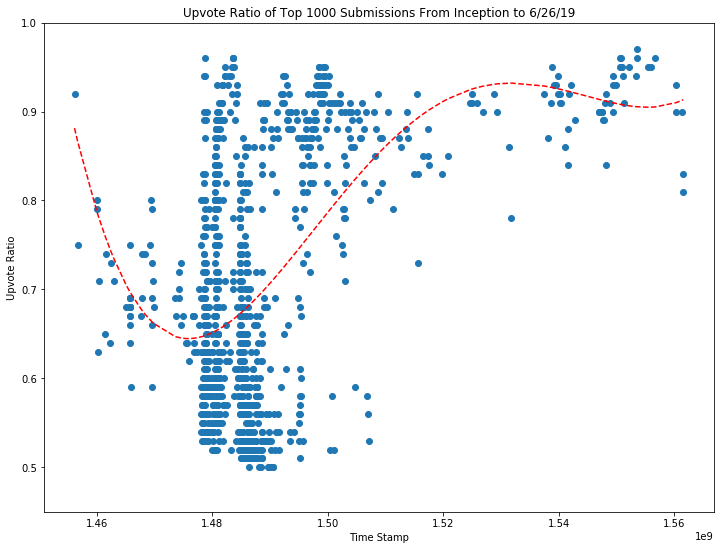

In [161]:
# Opening Data
data2 = pd.read_csv("top_sub_comment_data_unix_sorted.csv")

# Scatter Plot
plt.figure(figsize=(12,9))
plt.scatter(data2['Time Stamp'], data2['Upvote Ratio'])
plt.title("Upvote Ratio of Top 1000 Submissions From Inception to 6/26/19")
plt.ylabel("Upvote Ratio")
plt.xlabel("Time Stamp")
plt.ylim(.45, 1)
x = data2["Time Stamp"]
y = data2["Upvote Ratio"]

# Regression Line
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

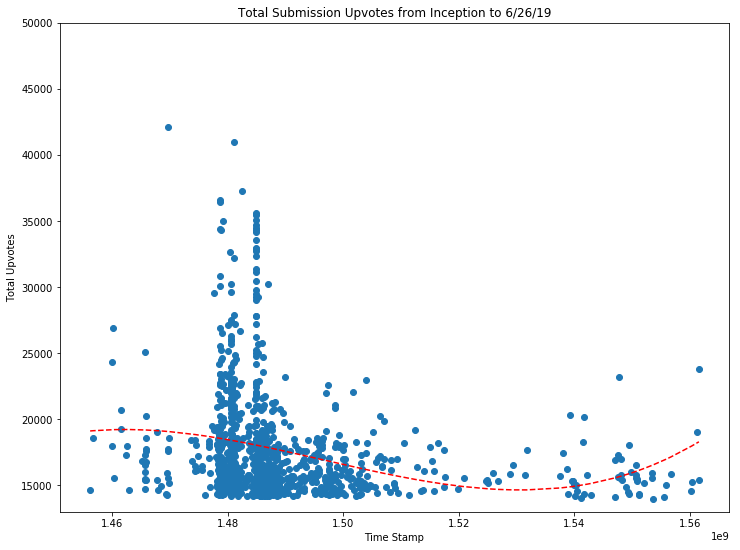

In [159]:
# Opening Data
data3 = pd.read_csv("top_sub_comment_data_unix_sorted.csv")

# Scatter Plot
plt.figure(figsize=(12,9))
plt.scatter(data3['Time Stamp'], data3['Total Upvotes'])
plt.title("Total Submission Upvotes from Inception to 6/26/19")
plt.ylabel("Total Upvotes")
plt.xlabel("Time Stamp")
plt.ylim(13000, 50000)
x = data3["Time Stamp"]
y = data3["Total Upvotes"]

# Regression Line
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sam\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
quarantine_text = open("master_comments_quarantine.txt", encoding="ANSI").read()

In [11]:
# Punctuation Removal & Casefolding
for char in punctuation:
    quarantine_text = quarantine_text.replace(char, "")
quarantine_text = quarantine_text.casefold()

In [12]:
# Tokenization & Stopwords
tokens = word_tokenize(quarantine_text)

stop = stopwords.words("english")

quarantine_no_stops = [word for word in tokens if word not in stopwords.words('english')]
    

In [13]:
# Saving no stops, no punctuation, tokenized list to a txt file
MyFile=open('quarantine_no_stops.txt', 'w', encoding="utf-8")

for element in quarantine_no_stops:
     MyFile.write(element)
     MyFile.write('\n')
MyFile.close()

In [193]:
freq = Counter(quarantine_no_stops)
freq.most_common(15)

[('people', 2534),
 ('like', 2491),
 ('trump', 1833),
 ('reddit', 1816),
 ('get', 1814),
 ('dont', 1598),
 ('us', 1593),
 ('one', 1569),
 ('would', 1343),
 ('im', 1271),
 ('sub', 1242),
 ('even', 1217),
 ('think', 1168),
 ('know', 1145),
 ('see', 1089)]

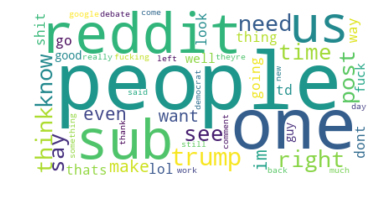

In [73]:
# Word Cloud of all tokenized comments in the top 250 threads t+12 hours after the quarantine.
quarantinecloud = open("quarantine_no_stops.txt", encoding="ANSI").read()
wordcloud = WordCloud(background_color="white", max_words = 50).generate(quarantinecloud)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
all_text = open("master_comments_top(100).txt", encoding="ANSI").read()

In [36]:
# Punctuation Removal & Casefolding
for char in punctuation:
    all_text = all_text.replace(char, "")
all_text = all_text.casefold()

In [37]:
# Tokenization & Stopwords
tokens2 = word_tokenize(all_text)
stop = stopwords.words("english")
all_text_no_stops = [word for word in tokens2 if word not in stopwords.words('english')]

Cleaning Up UniCode errors
for element in all_text_no_stops:
    all_text_no_stops.remove("httpimgurcom0cf3yty")
    all_text_no_stops.remove("â—•â—•")
    all_text_no_stops.remove("à¼½ã\x81¤")
    all_text_no_stops.remove("à¼¼")

In [138]:
# Saving no stops, no punctuation, tokenized list to a txt file
MyFile2=open('all_text_no_stops.txt', 'w', encoding="utf-8")

for element in all_text_no_stops:
     MyFile2.write(element)
     MyFile2.write('\n')
MyFile2.close()

In [194]:
freq2 = Counter(all_text_no_stops)
freq2.most_common(15)

[('hillary', 130289),
 ('clinton', 128046),
 ('news', 83107),
 ('fake', 81898),
 ('trump', 22014),
 ('cnn', 21797),
 ('people', 11869),
 ('like', 11242),
 ('would', 9838),
 ('dont', 8642),
 ('im', 8596),
 ('racism', 8389),
 ('get', 8068),
 ('take', 7071),
 ('know', 7011)]

In [118]:
total_tokens = len(all_text_no_stops)
Hillary_Clinton_Fake_News = 130289+128046+83107+81898
percent = Hillary_Clinton_Fake_News/total_tokens
wow = "Out of the {} words in the top 100 threads, {}% were either Hillary Clinton or Fake News"
print(wow.format(total_tokens, int(100*round(percent, 2))))

Out of the 2059334 words in the top 100 threads, 21% were either Hillary Clinton or Fake News


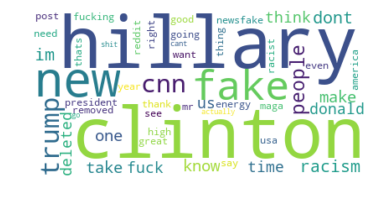

In [137]:
# Word Cloud for all tokenized comments in top 100 submissions with bigrams removed.
fullcloud = open("all_text_no_stops.txt", encoding="ANSI").read()
wordcloud = WordCloud(background_color="white", max_words = 50, collocations = False).generate(fullcloud)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [163]:
# Summed Redditor Activity for all Redditors who posted to the current top 3 "Hot" submissions in r/The_Donald 
from psaw import PushshiftAPI

api = PushshiftAPI()
redditor_activity = []
redditors = []

# Creates list of all Redditors who have submitted a comment in the top 3 submissions
for submission in subreddit.hot(limit=3):
    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():
        redditors.append(comment.author)
        
# Remove duplicate Redditors from list
redditors = list(dict.fromkeys(redditors))

# PSAW activity function can aggregate lists as argument, no loop needed!
redditor_activity = api.redditor_subreddit_activity(redditors)

print(redditor_activity)

NameError: name 'subreddit' is not defined

In [ ]:
# Summed Redditor Activity for all Redditors who posted to the #3 thread of all time on "The_Donald" : 
    # "The New Algorithm Was Designed To Keep President Trump From The Front Page... But Sadly, That Won't Happen" 

top_sub_3 = reddit.submission(id = "5gvy1j")

redditor_activity_top = []
redditor_top = []

top_sub_3.comments.replace_more(limit=None)
for comment in top_sub_3.comments.list():
        redditor_top.append(comment.author)

redditor_top = list(dict.fromkeys(redditor_top))

redditor_activity_top = api.redditor_subreddit_activity(redditor_top)

print(redditor_activity_top)

In [ ]:
# Summed activity for current top thread on r/all, a very small control

redditor_all = []

for submission in reddit.subreddit("all").hot(limit=1):
    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():
        redditor_all.append(comment.author)

# Remove Duplicate Redditors from list
redditor_all = list(dict.fromkeys(redditor_all))

redditor_activity_all = api.redditor_subreddit_activity(redditor_all)

print(redditor_activity_all)

In [ ]:
# Converting nested dictionary into two lists
keys = list(redditor_activity_all["comment"].keys())
values = list(redditor_activity_all["comment"].values())

In [ ]:
sizes = values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels = keys, colors = colors, shadow = True)
plt.tight_layout()




list.remove?